In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import log_loss
import itertools
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


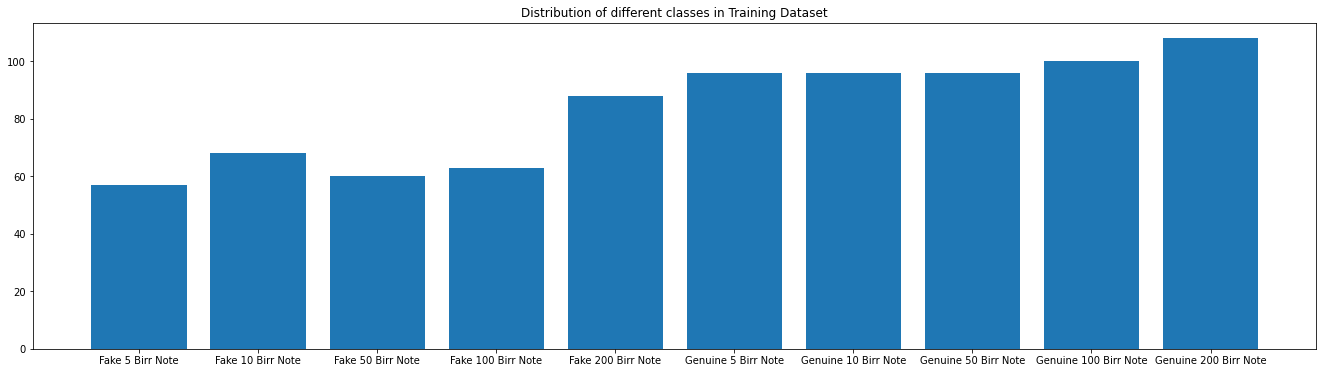

In [ ]:
image_folder = ['Fake 5 Birr Note', 'Fake 10 Birr Note', 'Fake 50 Birr Note', 'Fake 100 Birr Note', 'Fake 200 Birr Note','Genuine 5 Birr Note','Genuine 10 Birr Note','Genuine 50 Birr Note','Genuine 100 Birr Note','Genuine 200 Birr Note']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Training Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(23, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Fake 5 Birr Note', 'Fake 10 Birr Note', 'Fake 50 Birr Note', 'Fake 100 Birr Note', 'Fake 200 Birr Note','Genuine 5 Birr Note','Genuine 10 Birr Note','Genuine 50 Birr Note','Genuine 100 Birr Note','Genuine 200 Birr Note']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Training Data/'+i+'/'))))

Training Fake 5 Birr Note images are: 57
Training Fake 10 Birr Note images are: 68
Training Fake 50 Birr Note images are: 60
Training Fake 100 Birr Note images are: 63
Training Fake 200 Birr Note images are: 88
Training Genuine 5 Birr Note images are: 96
Training Genuine 10 Birr Note images are: 96
Training Genuine 50 Birr Note images are: 96
Training Genuine 100 Birr Note images are: 100
Training Genuine 200 Birr Note images are: 108


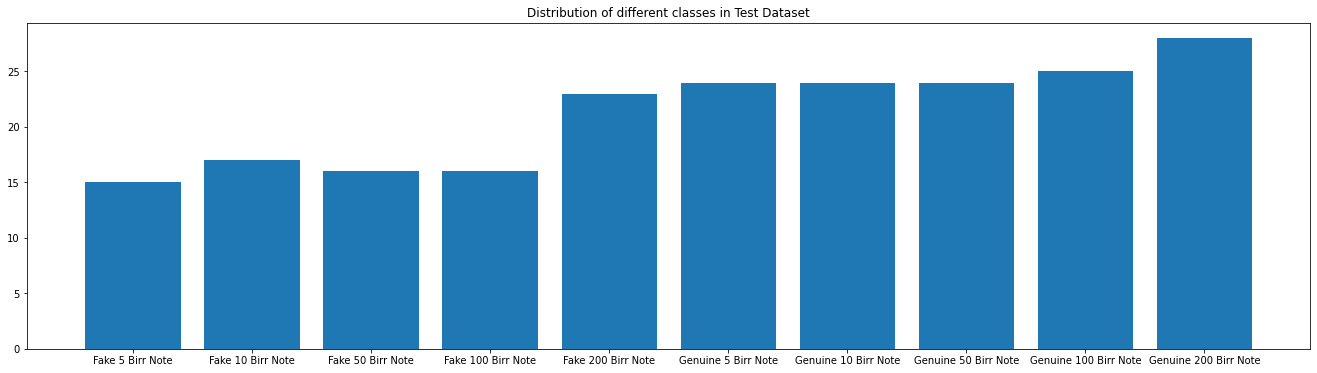

In [ ]:
image_folder = ['Fake 5 Birr Note', 'Fake 10 Birr Note', 'Fake 50 Birr Note', 'Fake 100 Birr Note', 'Fake 200 Birr Note','Genuine 5 Birr Note','Genuine 10 Birr Note','Genuine 50 Birr Note','Genuine 100 Birr Note','Genuine 200 Birr Note'];
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Test Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(23, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

In [ ]:
for i in ['Fake 5 Birr Note', 'Fake 10 Birr Note', 'Fake 50 Birr Note', 'Fake 100 Birr Note', 'Fake 200 Birr Note','Genuine 5 Birr Note','Genuine 10 Birr Note','Genuine 50 Birr Note','Genuine 100 Birr Note','Genuine 200 Birr Note']:
    print('Test {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Test Data/'+i+'/'))))

Test Fake 5 Birr Note images are: 15
Test Fake 10 Birr Note images are: 17
Test Fake 50 Birr Note images are: 16
Test Fake 100 Birr Note images are: 16
Test Fake 200 Birr Note images are: 23
Test Genuine 5 Birr Note images are: 24
Test Genuine 10 Birr Note images are: 24
Test Genuine 50 Birr Note images are: 24
Test Genuine 100 Birr Note images are: 25
Test Genuine 200 Birr Note images are: 28


In [ ]:
img_width=224; img_height=224

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Dataset/Training Data/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 832 images belonging to 10 classes.


In [ ]:
TEST_DIR = '/content/drive/MyDrive/Dataset/Test Data/'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=1,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 257 images belonging to 10 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = False)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'), 
    Dropout(0.20),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),#why?
    Dense(10, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       7

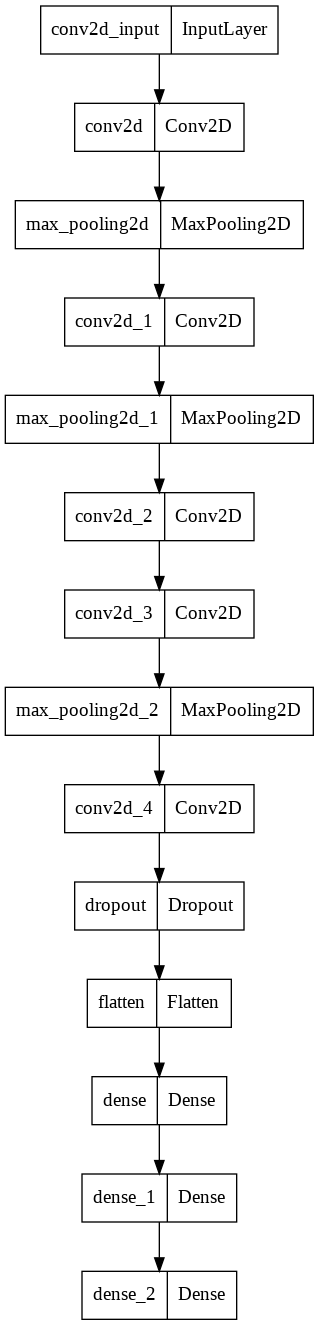

In [ ]:
plot_model(model, to_file='/content/drive/MyDrive/Dataset/ModelDenseNet.png')

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(factor=0.2, min_lr=0.01)

In [ ]:
history = model.fit(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=test_generator,
                              callbacks = [learning_rate_reduction]
                    )

Epoch 1/100
26/26 [==============================] - 548s 21s/step - loss: 2.8407 - accuracy: 0.1370 - val_loss: 2.2307 - val_accuracy: 0.1868 - lr: 0.0010
Epoch 2/100
26/26 [==============================] - 125s 5s/step - loss: 1.7256 - accuracy: 0.3654 - val_loss: 1.6887 - val_accuracy: 0.3035 - lr: 0.0010
Epoch 3/100
26/26 [==============================] - 121s 5s/step - loss: 1.1392 - accuracy: 0.5649 - val_loss: 1.3441 - val_accuracy: 0.3969 - lr: 0.0010
Epoch 4/100
26/26 [==============================] - 121s 5s/step - loss: 0.7923 - accuracy: 0.6851 - val_loss: 1.0013 - val_accuracy: 0.5642 - lr: 0.0010
Epoch 5/100
26/26 [==============================] - 120s 5s/step - loss: 0.7461 - accuracy: 0.6875 - val_loss: 1.1364 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 6/100
26/26 [==============================] - 121s 5s/step - loss: 0.6280 - accuracy: 0.7332 - val_loss: 1.2366 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 7/100
26/26 [==============================] - 121s 5s/step - l

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/GetchCNNArch.h5')

In [ ]:
print("Accuracy of the model is-" , model.evaluate(train_generator)[1]*100, "%")
print("loss of the model is-" , model.evaluate(train_generator)[0])

26/26 [==============================] - 103s 4s/step - loss: 0.0437 - accuracy: 0.9868
Accuracy of the model is- 98.67788553237915 %
26/26 [==============================] - 97s 4s/step - loss: 0.0386 - accuracy: 0.9892
loss of the model is- 0.03857029229402542


In [ ]:
print("Accuracy of the model is-" , model.evaluate(test_generator)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_generator)[0])


257/257 [==============================] - 28s 107ms/step - loss: 1.7538 - accuracy: 0.6809
Accuracy of the model is- 68.09338331222534 %
257/257 [==============================] - 27s 107ms/step - loss: 1.7538 - accuracy: 0.6809
loss of the model is- 1.7538020610809326


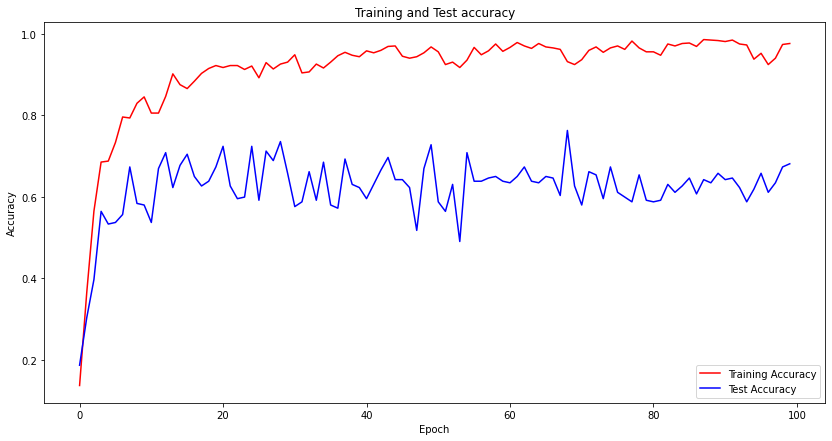

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test accuracy')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and Test loss')

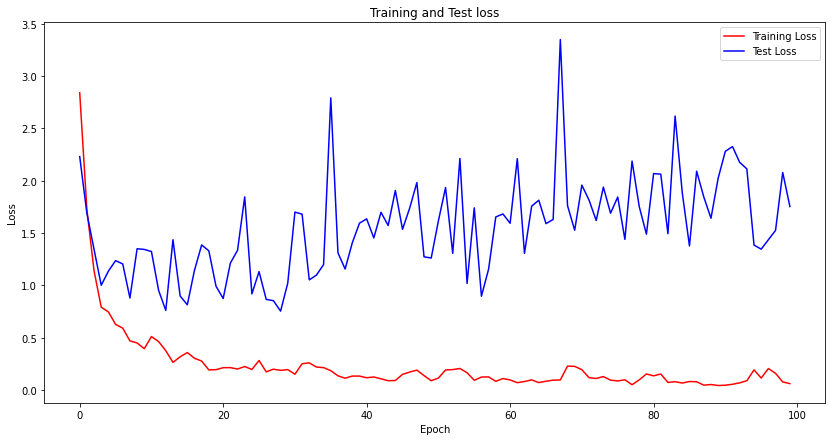

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test loss')

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
test_images_dir = '/content/drive/MyDrive/Dataset/All_Test_Data/'
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/1Last_Test_Data.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

209/209 [==============================] - 1s 4ms/step
[8 8 8 8 8 8 8 8 8 8 8 8 3 3 3 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 2 7 7 7 7 7 7 7 7 7 7
 7 2 2 2 2 2 2 2 2 2 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 8 8 8 8 8 8 8 8 8 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 6 6 6 6 6 6 6 6 8 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/1Last_Test_Data.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0      0
1      0
2      0
3      0
4      0
      ..
204    9
205    9
206    9
207    9
208    9
Name: labels, Length: 209, dtype: int64


In [ ]:
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[ 0,  0,  0,  3,  0,  0,  0,  0, 12,  0],
       [16,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 23,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 24],
       [ 0,  1,  0,  0,  0,  0, 23,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 27,  0,  0]])

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset/All_Test_Data'
classes = os.listdir(train_dir)


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
   
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

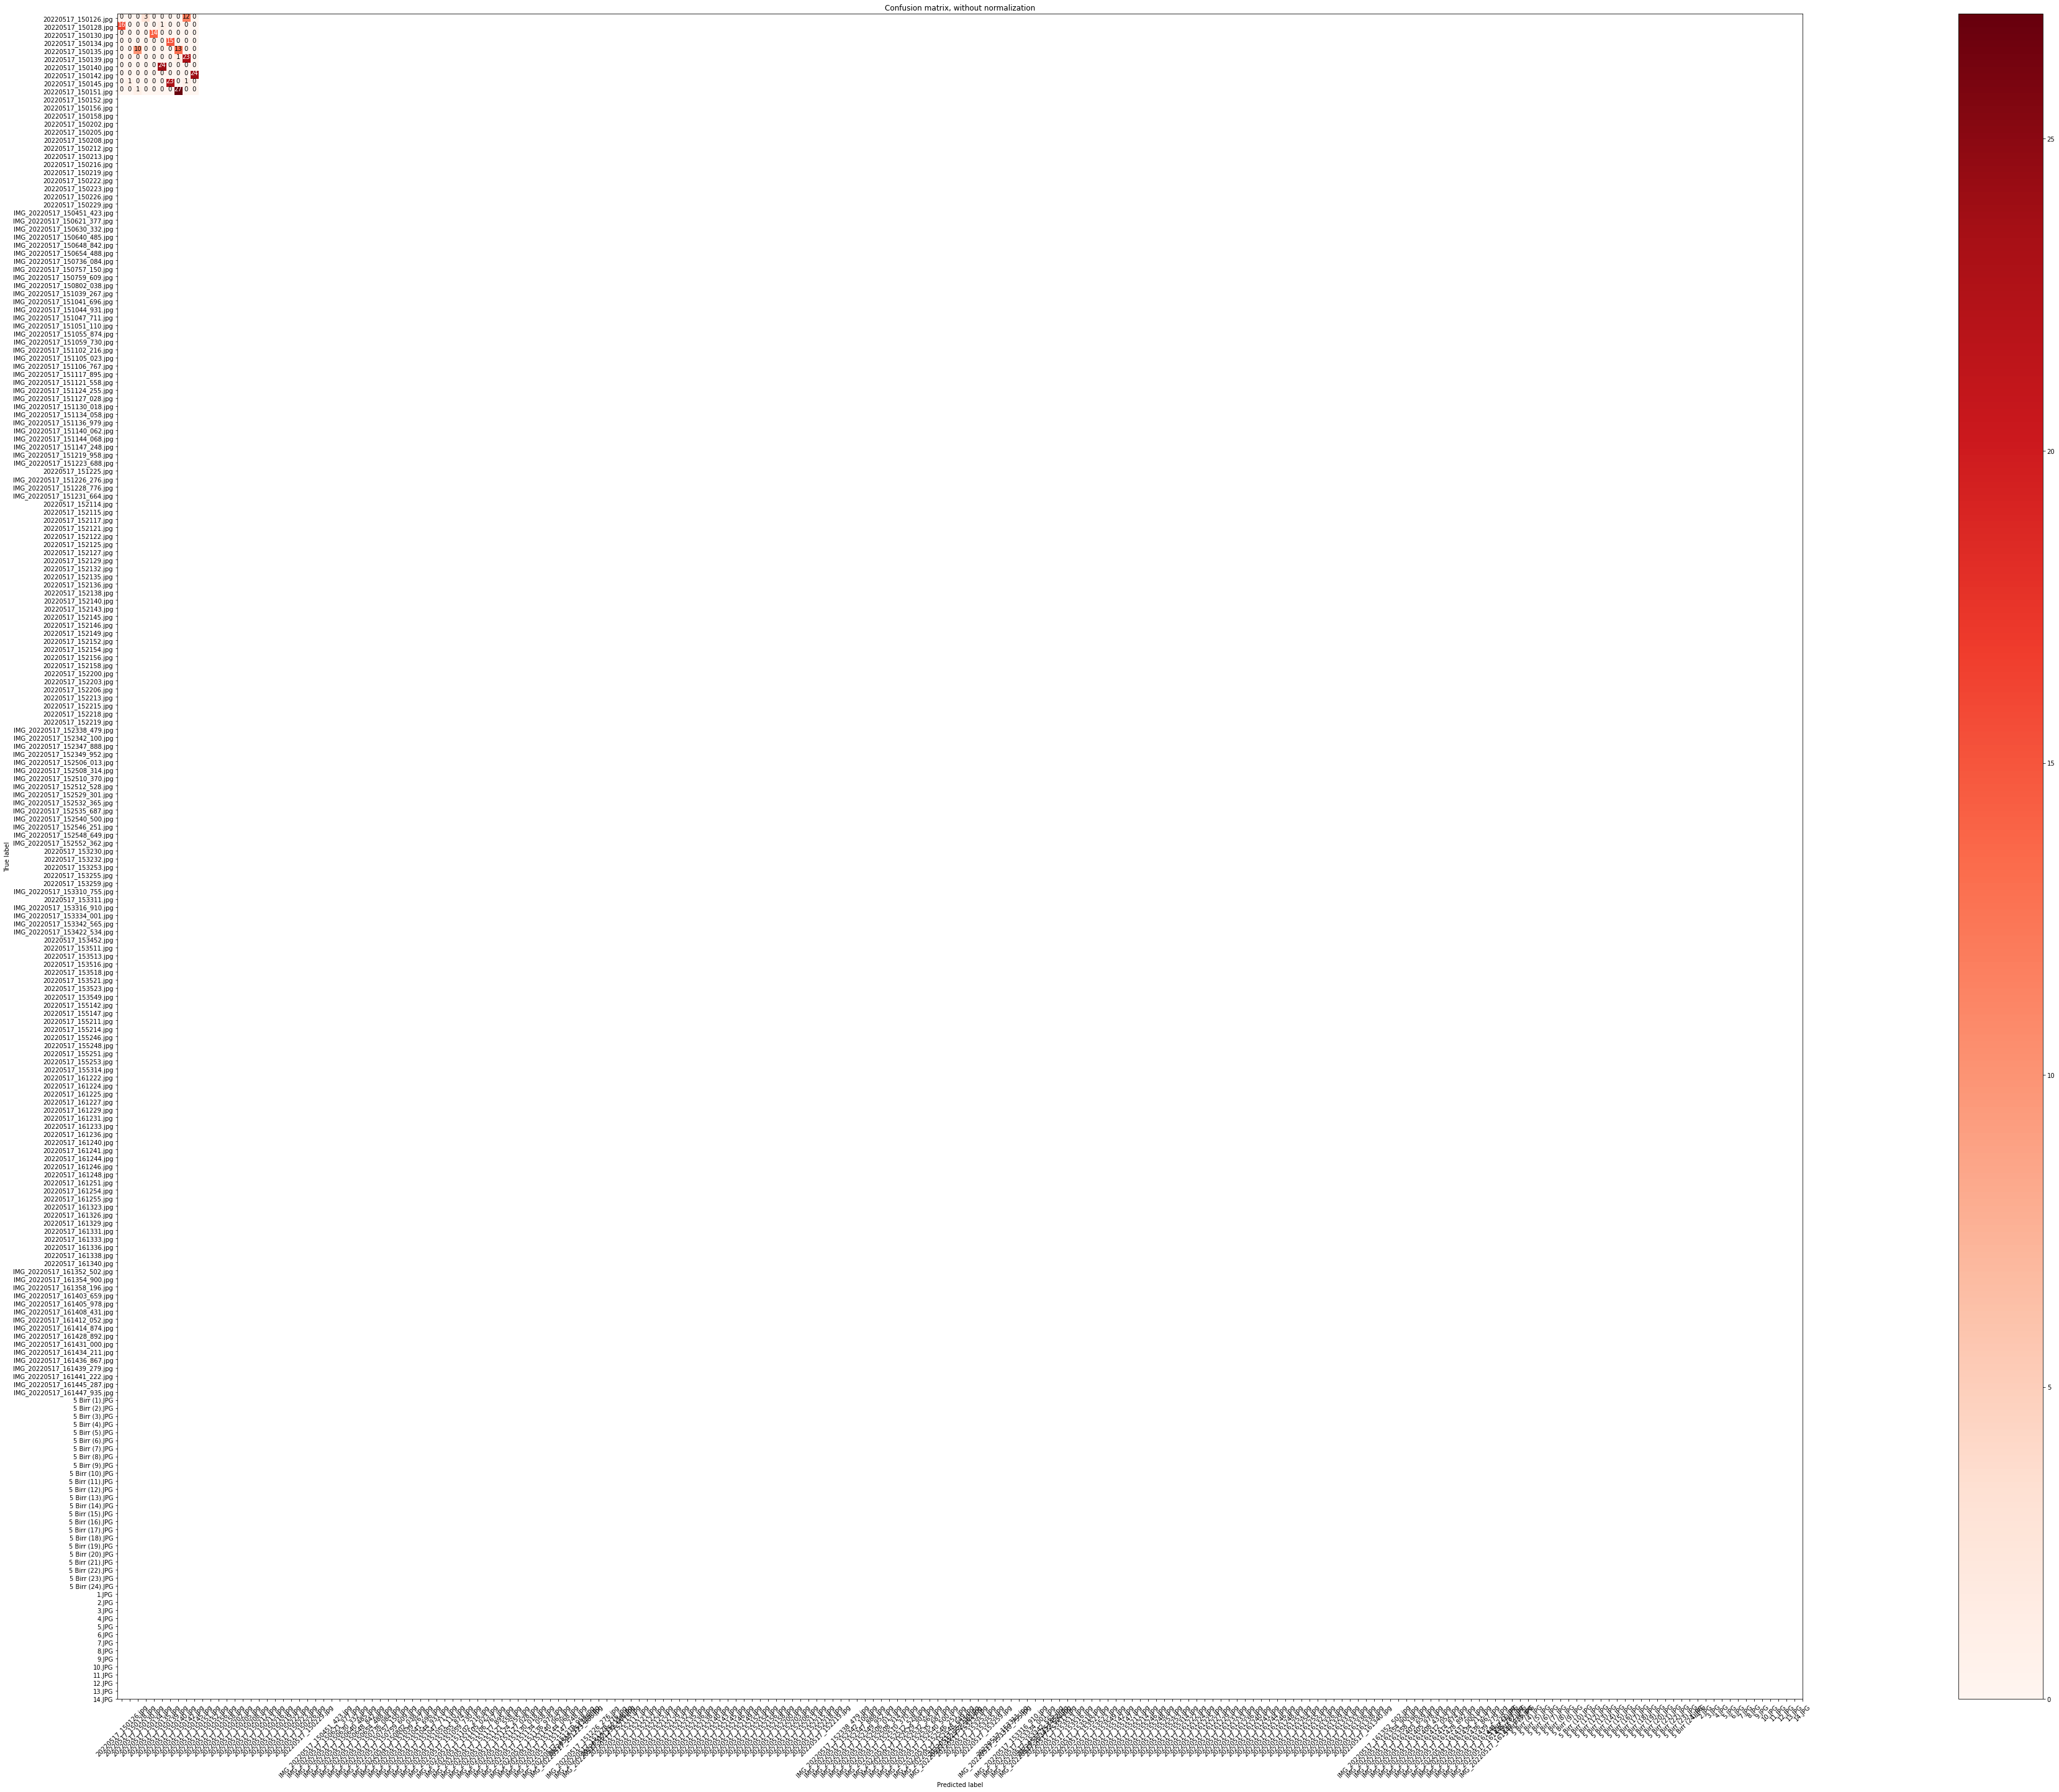

In [ ]:

np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(70,40))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()